In [68]:
!pip install pycaret -q

In [1]:
import pandas as pd
import shap

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv') 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True) 

gender_mapper = {'male': 0, 'female': 1} 

data['Sex'].replace(gender_mapper, inplace=True) 
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0]) 
data['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in data['Title']] 

data = data.rename(columns={'Title': 'Title_Unusual'}) 
data.drop('Name', axis=1, inplace=True) 

data['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in data['Cabin']] 
data.drop('Cabin', axis=1, inplace=True) 

emb_dummies = pd.get_dummies(data['Embarked'], drop_first=True, prefix='Embarked') 
data = pd.concat([data, emb_dummies], axis=1) 
data.drop('Embarked', axis=1, inplace=True) 

data['Age'] = data['Age'].fillna(int(data['Age'].mean()))

In [4]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


In [5]:
from pycaret.classification import * 
clf = setup(data, target='Survived', session_id=42)

Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(891, 11)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.822,0.8652,0.7284,0.791,0.7563,0.6169,0.62,0.0258
1,Ridge Classifier,0.8202,0,0.7326,0.792,0.7576,0.6154,0.62,0.0032
2,CatBoost Classifier,0.8202,0.8674,0.7284,0.7943,0.7562,0.6148,0.6197,0.7331
3,Gradient Boosting Classifier,0.8186,0.8585,0.7241,0.7951,0.7537,0.6113,0.6168,0.0667
4,Linear Discriminant Analysis,0.8169,0.8597,0.7326,0.7842,0.7544,0.6091,0.6131,0.0037
5,Logistic Regression,0.8106,0.8638,0.7326,0.7703,0.7476,0.5967,0.6003,0.0238
6,Ada Boost Classifier,0.8089,0.8357,0.737,0.7654,0.747,0.5942,0.5983,0.0556
7,Extreme Gradient Boosting,0.8059,0.8505,0.7118,0.771,0.7363,0.5838,0.5882,0.0673
8,Random Forest Classifier,0.8043,0.8412,0.7074,0.7712,0.7344,0.5804,0.5848,0.1108
9,Extra Trees Classifier,0.7963,0.8351,0.7158,0.7524,0.7303,0.5671,0.5707,0.1468


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [7]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.9017,0.7917,0.7917,0.7917,0.6635,0.6635
1,0.7619,0.8686,0.5833,0.7368,0.6512,0.4741,0.4816
2,0.7778,0.8307,0.625,0.75,0.6818,0.5132,0.5183
3,0.8387,0.9197,0.8261,0.76,0.7917,0.6605,0.662
4,0.8226,0.8838,0.6667,0.8421,0.7442,0.6112,0.6209
5,0.871,0.9101,0.8333,0.8333,0.8333,0.7281,0.7281
6,0.8387,0.8783,0.75,0.8182,0.7826,0.6548,0.6564
7,0.8065,0.7588,0.6667,0.8,0.7273,0.5792,0.585
8,0.8871,0.8893,0.8333,0.8696,0.8511,0.7602,0.7607
9,0.7742,0.8114,0.7083,0.7083,0.7083,0.5241,0.5241


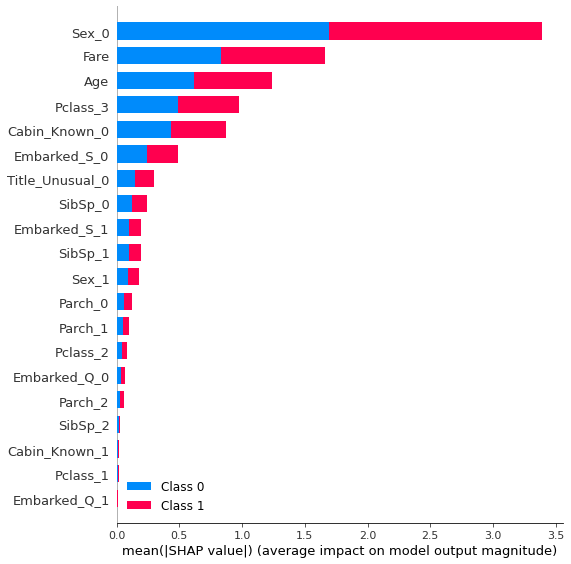

In [8]:
# interpreting model
interpret_model(model)

In [65]:
interpret_model(model, plot = 'reason', observation = 12)

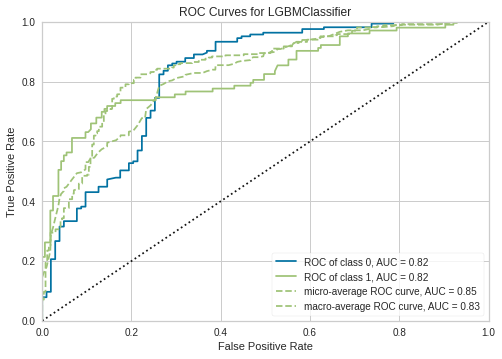

In [49]:
plot_model(model)

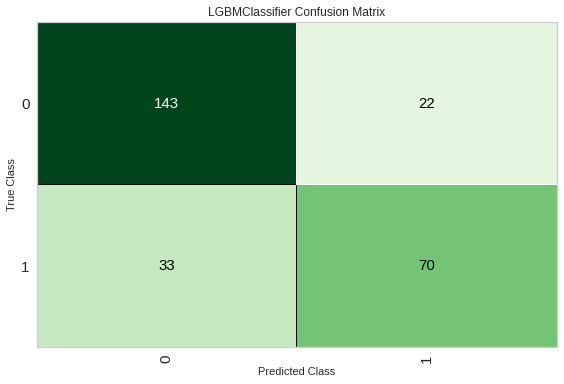

In [17]:
plot_model(model, 'confusion_matrix')

In [55]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8787,0.7917,0.7917,0.7917,0.6635,0.6635
1,0.7937,0.8921,0.7083,0.7391,0.7234,0.559,0.5593
2,0.746,0.8446,0.625,0.6818,0.6522,0.4528,0.4538
3,0.8226,0.9114,0.8261,0.7308,0.7755,0.6298,0.633
4,0.7903,0.852,0.5833,0.8235,0.6829,0.533,0.5507
5,0.871,0.9139,0.8333,0.8333,0.8333,0.7281,0.7281
6,0.8387,0.9024,0.75,0.8182,0.7826,0.6548,0.6564
7,0.7419,0.7484,0.625,0.6818,0.6522,0.4477,0.4487
8,0.871,0.898,0.8333,0.8333,0.8333,0.7281,0.7281
9,0.7903,0.7988,0.7083,0.7391,0.7234,0.5547,0.555


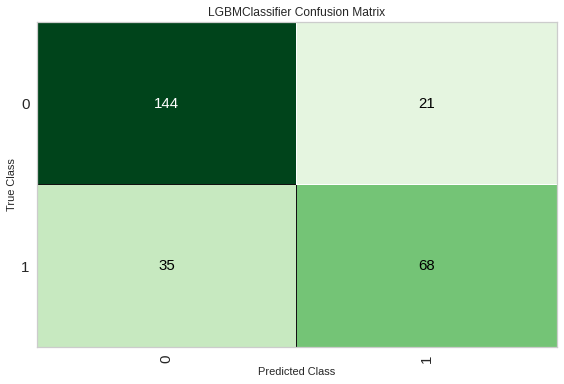

In [56]:
plot_model(tuned_model, 'confusion_matrix')

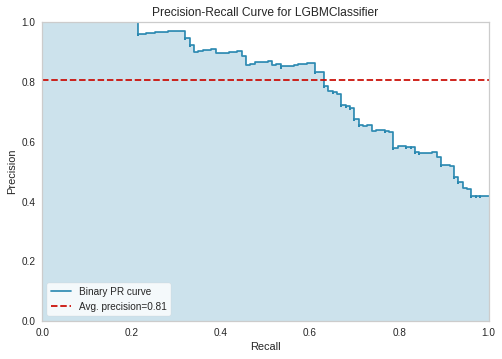

In [61]:
plot_model(tuned_model, plot = 'pr')

In [57]:
predictions = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.791,0.8352,0.6602,0.764,0.7083,0.5469,0.5504


In [62]:
predictions.head(10)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,...,Title_Unusual_1,Cabin_Known_0,Cabin_Known_1,Embarked_Q_0,Embarked_Q_1,Embarked_S_0,Embarked_S_1,Survived,Label,Score
0,61.0,32.3208,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0.0725
1,19.0,7.8958,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.0671
2,29.0,7.7500,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0.2169
3,27.0,6.9750,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,0.0704
4,45.0,8.0500,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,0.0617
5,70.0,71.0000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0.4689
6,29.0,0.0000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.0224
7,23.0,13.7917,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1,0.9292
8,30.0,8.0500,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.2486
9,19.0,26.0000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1,0.8157


In [59]:
finalize_model(tuned_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.7, max_depth=20,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=200, n_jobs=-1, num_leaves=50, objective=None,
               random_state=42, reg_alpha=0.1, reg_lambda=0.3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [60]:
save_model(tuned_model, 'titanic_lgbm')

Transformation Pipeline and Model Succesfully Saved


In [70]:
loaded_bestmodel = load_model('titanic_lgbm')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Survived',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_L...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.7, max_depth=20,
                                min_child_samples=20,

In [69]:
!mlflow ui

[2020-10-24 19:24:51 -0300] [17865] [INFO] Starting gunicorn 20.0.4
[2020-10-24 19:24:51 -0300] [17865] [INFO] Listening at: http://127.0.0.1:5000 (17865)
[2020-10-24 19:24:51 -0300] [17865] [INFO] Using worker: sync
[2020-10-24 19:24:51 -0300] [17868] [INFO] Booting worker with pid: 17868
Traceback (most recent call last):
  File "/home/amp/tools/anaconda3/envs/ds-academy/lib/python3.7/site-packages/mlflow/store/tracking/file_store.py", line 699, in _list_run_infos
    run_info = self._get_run_info_from_dir(r_dir)
  File "/home/amp/tools/anaconda3/envs/ds-academy/lib/python3.7/site-packages/mlflow/store/tracking/file_store.py", line 529, in _get_run_info_from_dir
    meta = read_yaml(run_dir, FileStore.META_DATA_FILE_NAME)
  File "/home/amp/tools/anaconda3/envs/ds-academy/lib/python3.7/site-packages/mlflow/utils/file_utils.py", line 168, in read_yaml
    raise MissingConfigException("Yaml file '%s' does not exist." % file_path)
mlflow.exceptions.MissingConfigException: Yaml file './ml